# **Bicyclist Data Analysis Using Python**

On this occasion, I will be analyzing the data from a fictional bike-sharing company called Cyclistic. 
I pretend to be a data analyst of this company, my goal is to provide insights about the behavior of Cyclistic's users and make business recommendations. To begin, let's import the necessary libraries for this analysis, **pandas** and **matplotlib**. Now, we're interested in determining the duration of the data available.



# **Import the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the datas as dataframe in python and name it as df_number
df_1= pd.read_csv('/kaggle/input/divvy-tripdata/202301-divvy-tripdata.csv')
df_2= pd.read_csv('/kaggle/input/divvy-tripdata/202302-divvy-tripdata.csv')
df_3= pd.read_csv('/kaggle/input/divvy-tripdata/202303-divvy-tripdata.csv')
df_4= pd.read_csv('/kaggle/input/divvy-tripdata/202304-divvy-tripdata.csv')
# merge those dataframe into one to make easier to be analyzed
df=pd.concat([df_1,df_2,df_3,df_4],ignore_index=True)
# show he first 10 row get the big picture of the data
df.head(5)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


# **Data Cleaning Process**

In [2]:
# Check the dimension of the data
df.shape

(1066014, 13)

The data contains **1066014 rows** and **13 columns**, wow that's huge, so let's see what are the columns of the data.

In [3]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

We want to understand how users behave and gain insights from their usage patterns. To achieve this, we only need to focus on a few specific columns: **ride_id, rideable_type, started_at, ended_at, and member_casual**. Additionally, we will add a new column called **"duration"** to represent the length of time the bike was used. By narrowing down our analysis to these columns, we can gather valuable information about the users, the type of bike they rode, when they started and ended their rides, and whether they were members or casual users.

In [4]:
# define new dataframe
df_2=df[['ride_id','rideable_type','started_at','ended_at','member_casual']]
df_2.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member


In [5]:
# add new column, duration
df_2['started_at'] = pd.to_datetime(df_2['started_at'])
df_2.loc[:, 'ended_at'] = pd.to_datetime(df_2['ended_at'])
# Calculate duration as the difference between "ended at" and "started at" columns
df_2['duration'] = (df_2['ended_at'] - df_2['started_at'])
# Add a new column, duration in minutes
df_2['duration (min)'] = df_2['duration'].dt.total_seconds() / 60
df_2.head(10)

/tmp/ipykernel_21/3579850392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['started_at'] = pd.to_datetime(df_2['started_at'])
/tmp/ipykernel_21/3579850392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[:, 'ended_at'] = pd.to_datetime(df_2['ended_at'])
/tmp/ipykernel_21/3579850392.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i

,ride_id,rideable_type,started_at,ended_at,member_casual,duration,duration (min)
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,0 days 00:10:51,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,0 days 00:08:29,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,0 days 00:13:14,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,0 days 00:08:46,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,0 days 00:15:19,15.316667
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member,0 days 00:03:13,3.216667
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member,0 days 00:14:00,14.000000
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member,0 days 00:09:21,9.350000
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member,0 days 00:12:27,12.450000
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member,0 days 00:12:33,12.550000


Allright, so we have the data that we want to analyze, but first, let's check the completeness of the data.


In [6]:
# Check the missing values
df_2.isnull().sum()

ride_id           0
rideable_type     0
started_at        0
ended_at          0
member_casual     0
duration          0
duration (min)    0
dtype: int64

It seems that our data is completed. Let's see the type of the data.

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066014 entries, 0 to 1066013
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype          
---  ------          --------------    -----          
 0   ride_id         1066014 non-null  object         
 1   rideable_type   1066014 non-null  object         
 2   started_at      1066014 non-null  datetime64[ns] 
 3   ended_at        1066014 non-null  datetime64[ns] 
 4   member_casual   1066014 non-null  object         
 5   duration        1066014 non-null  timedelta64[ns]
 6   duration (min)  1066014 non-null  float64        
dtypes: datetime64[ns](2), float64(1), object(3), timedelta64[ns](1)
memory usage: 56.9+ MB


It appears that all the data is in the correct format. The "started_at" and "ended_at" columns are stored as datetime types, which is suitable for analyzing time-related information. The "duration" column is represented as decimal numbers (float64), which allows for precise calculations. Allright let see the summary of the data to know if there's an error of our data.

In [8]:
df_2.describe()

,duration,duration (min)
count,1066014,1.066014e+06
mean,0 days 00:14:47.985237529,1.479975e+01
std,0 days 02:10:42.560372567,1.307093e+02
min,-1 days +23:51:04,-8.933333e+00
25%,0 days 00:04:36,4.600000e+00
50%,0 days 00:07:55,7.916667e+00
75%,0 days 00:13:55,1.391667e+01
max,23 days 08:03:44,3.360373e+04


First, let's take a look again of our data!

In [9]:
df_2.head(10)

,ride_id,rideable_type,started_at,ended_at,member_casual,duration,duration (min)
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,0 days 00:10:51,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,0 days 00:08:29,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,0 days 00:13:14,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,0 days 00:08:46,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,0 days 00:15:19,15.316667
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member,0 days 00:03:13,3.216667
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member,0 days 00:14:00,14.000000
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member,0 days 00:09:21,9.350000
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member,0 days 00:12:27,12.450000
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member,0 days 00:12:33,12.550000


Allright, let's take a look at statistical summary of our data!

In [10]:
# Statistical summary of our data
df_2.describe()

,duration,duration (min)
count,1066014,1.066014e+06
mean,0 days 00:14:47.985237529,1.479975e+01
std,0 days 02:10:42.560372567,1.307093e+02
min,-1 days +23:51:04,-8.933333e+00
25%,0 days 00:04:36,4.600000e+00
50%,0 days 00:07:55,7.916667e+00
75%,0 days 00:13:55,1.391667e+01
max,23 days 08:03:44,3.360373e+04


Wait, as you see, the data is somewhat confusing, as there's a duration with -1 days +23.51:04. To clean that, we need to filter the data with duration>0

In [11]:
df_2 = df_2[df_2['duration'] > pd.Timedelta(0)]

Let's take a look again with our data!


In [12]:
df_2.head(10)

,ride_id,rideable_type,started_at,ended_at,member_casual,duration,duration (min)
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,member,0 days 00:10:51,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,member,0 days 00:08:29,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,casual,0 days 00:13:14,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,member,0 days 00:08:46,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,member,0 days 00:15:19,15.316667
5,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,member,0 days 00:03:13,3.216667
6,2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,member,0 days 00:14:00,14.000000
7,DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,member,0 days 00:09:21,9.350000
8,34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,member,0 days 00:12:27,12.450000
9,BC8AB1AA51DA9115,classic_bike,2023-01-06 16:37:19,2023-01-06 16:49:52,member,0 days 00:12:33,12.550000


Let's take a look again with our statistical summary!

In [13]:
# change the format from scientific to normal format
pd.set_option('display.float_format', '{:.3f}'.format)

df_2.describe()

,duration,duration (min)
count,1065942,1065942.000
mean,0 days 00:14:48.045915256,14.801
std,0 days 02:10:42.821740418,130.714
min,0 days 00:00:01,0.017
25%,0 days 00:04:36,4.600
50%,0 days 00:07:55,7.917
75%,0 days 00:13:55,13.917
max,23 days 08:03:44,33603.733


The data seems fine. Allright, so the data is well prepared and then right now we can move to Data Analysis Process!

# **Data Analysis Process**

For this analysis process, we'll split into three steps.
1. **Overall analysis (January-April)**
2. **Monthly analysis**
3. **The same day trip analysis**

# **Overall Analysis**

Allright, don't get bored to take a look of our statistical summary!

In [14]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_2.describe()

,duration,duration (min)
count,1065942,1065942.000
mean,0 days 00:14:48.045915256,14.801
std,0 days 02:10:42.821740418,130.714
min,0 days 00:00:01,0.017
25%,0 days 00:04:36,4.600
50%,0 days 00:07:55,7.917
75%,0 days 00:13:55,13.917
max,23 days 08:03:44,33603.733


As we can see, the standar deviation (std) that shows the high variability of the users's duration. The average of duration is **14 minutes**, the shortest duration is **1 sec** and the longest duration is **23 days 8 hours, 3 minutes, and 44 sec**. Well, from 1 sec to 23 days is really different, right? So, let's grouped the data based on **type of users** and **type of bikes.**

In [15]:
# data is grouped by type of users and type of bikes
df_3=df_2.groupby([df_2['member_casual'],df_2['rideable_type']])['duration (min)']
df_3.describe()

count    mean      std   min    25%    50%  \
member_casual rideable_type                                                   
casual        classic_bike   97795.000  28.006  104.211 0.017  6.633 11.783   
              docked_bike    15840.000 150.039 1011.028 0.033 13.617 25.067   
              electric_bike 178847.000  12.338   15.025 0.017  4.883  8.217   
member        classic_bike  359198.000  12.137   37.428 0.017  4.667  7.900   
              electric_bike 414262.000   9.885   15.261 0.017  4.083  6.967   

                               75%       max  
member_casual rideable_type                   
casual        classic_bike  22.933  1559.933  
              docked_bike   48.050 33603.733  
              electric_bike 14.417   480.450  
member        classic_bike  13.800  1559.667  
              electric_bike 11.783   481.400

As we can see, overall the member users are **higher** than the casual users, but casual users use bike longer than the member users. The casual users also use all types of bike, meanwhile the member users only use **classic** and **electric bike**. The average usage of docked bike from casual users is also **significantly higher** than usage of all types of  bike, whether it's from casual or member users, with the average usage is **150 minutes**. Next, we move to monthly analysis!

# **Monthly Analysis**

In [16]:
# define the dataframe that is grouped by month
df_3 = df_2.groupby(df_2['started_at'].dt.month)
# statistical summary of duration in minutes
df_3['duration (min)'].describe()

,count,mean,std,min,25%,50%,75%,max
started_at,,,,,,,,
1,190293.000,13.001,151.410,0.017,4.317,7.117,12.017,33603.733
2,190436.000,13.533,119.624,0.017,4.400,7.417,12.883,18865.767
3,258659.000,13.081,98.194,0.017,4.433,7.500,12.833,16808.067
4,426554.000,17.212,142.214,0.017,5.017,8.917,16.167,18395.483


The standard deviation for monthly data is between **98 minutes** and **151 minutes**, meaning the usage of users is quite diverse. This indicates that there is a **significant variation** in the duration of trips taken by users on a monthly basis, with some users taking shorter trips around **98 minutes** and others taking longer trips up to **151 minutes**.

In [17]:
# Counting days for max 
df_3['duration (min)'].max()/(60*24)

started_at
1   23.336
2   13.101
3   11.672
4   12.775
Name: duration (min), dtype: float64

Based on monthly data, we can see that the maximum usage duration per each month is varied, with 23 days as maximum and 11 days as minimum usage. Right now, we'll see the comparison monthly based on type of users.


In [18]:
# data is grouped by month and type of users
df_4 = df_2.groupby([df_2['started_at'].dt.month, 'member_casual'])
df_4['duration (min)'].describe()


count   mean     std   min   25%    50%    75%  \
started_at member_casual                                                       
1          casual         40005.000 22.917 325.234 0.017 4.783  7.767 13.300   
           member        150288.000 10.362  28.953 0.017 4.217  6.950 11.700   
2          casual         43014.000 23.194 245.705 0.033 5.150  8.683 15.767   
           member        147422.000 10.715  28.910 0.017 4.233  7.083 12.167   
3          casual         62194.000 21.415 194.271 0.017 5.133  8.667 15.517   
           member        196465.000 10.443  26.799 0.017 4.250  7.150 12.117   
4          casual        147269.000 27.676 238.718 0.017 6.200 11.283 21.983   
           member        279285.000 11.695  27.427 0.017 4.583  7.983 13.867   

                               max  
started_at member_casual            
1          casual        33603.733  
           member         1499.933  
2          casual        18865.767  
           member         1499.933  
3          casual        16808.067  
           member         1559.667  
4          casual        18395.483  
           member         1499.933

Based on previous data, we see that casual users tends to use longer than member users with the average of casual user is longer than **20 minutes**, meanwhile the member users is approximately **10 minutes**.
But, we can also see that the member users is higher than the casual users.
Next, we'll move to the preferences of bike that the users use.


In [19]:
df_5 = df_2.groupby([df_2['started_at'].dt.month, 'member_casual','rideable_type'])
df_5['duration (min)'].describe()


count    mean      std   min  \
started_at member_casual rideable_type                                     
1          casual        classic_bike   13909.000  22.452  101.887 0.033   
                         docked_bike     1738.000 212.103 1520.774 0.033   
                         electric_bike  24358.000   9.683   11.801 0.017   
           member        classic_bike   76385.000  11.179   36.990 0.017   
                         electric_bike  73903.000   9.518   17.003 0.017   
2          casual        classic_bike   15534.000  25.137  102.060 0.033   
                         docked_bike     2195.000 150.828 1044.032 0.050   
                         electric_bike  25285.000  10.919   12.327 0.033   
           member        classic_bike   74351.000  11.607   37.214 0.017   
                         electric_bike  73071.000   9.807   16.596 0.017   
3          casual        classic_bike   19456.000  26.007  107.422 0.033   
                         docked_bike     3020.000 132.377  828.994 0.083   
                         electric_bike  39718.000  10.728   12.135 0.017   
           member        classic_bike   87626.000  11.702   36.871 0.017   
                         electric_bike 108839.000   9.429   14.128 0.017   
4          casual        classic_bike   48896.000  31.292  104.133 0.017   
                         docked_bike     8887.000 143.708  930.804 0.033   
                         electric_bike  89486.000  14.176   17.262 0.017   
           member        classic_bike  120836.000  13.384   38.196 0.017   
                         electric_bike 158449.000  10.406   14.472 0.017   

                                          25%    50%    75%       max  
started_at member_casual rideable_type                                 
1          casual        classic_bike   5.450  8.850 15.383  1499.950  
                         docked_bike   10.804 18.967 30.188 33603.733  
                         electric_bike  4.317  6.917 11.267   479.933  
           member        classic_bike   4.500  7.367 12.467  1499.933  
                         electric_bike  3.950  6.533 10.983   479.967  
2          casual        classic_bike   5.938 10.083 18.967  1499.933  
                         docked_bike   12.817 22.817 41.667 18865.767  
                         electric_bike  4.583  7.533 12.733   322.617  
           member        classic_bike   4.500  7.517 13.017  1499.933  
                         electric_bike  3.983  6.683 11.383   481.367  
3          casual        classic_bike   6.167 10.600 19.583  1559.933  
                         docked_bike   12.100 21.517 38.242 16808.067  
                         electric_bike  4.633  7.567 12.700   479.867  
           member        classic_bike   4.550  7.700 13.300  1559.667  
                         electric_bike  4.017  6.750 11.283   480.450  
4          casual        classic_bike   7.850 14.333 28.233  1499.950  
                         docked_bike   15.817 28.367 56.867 18395.483  
                         electric_bike  5.333  9.283 16.783   480.450  
           member        classic_bike   5.017  8.733 15.617  1499.933  
                         electric_bike  4.283  7.467 12.683   481.400

Based on the previous data, we know that the casual users use all of three types of bike, they are classic, docked, and electric bike. However, the member users only use two types of bike, they are classic and electric bike. So, we finish with montly data, next we move to the same day trip data.

# **The same Day Trip Analysis**

In [20]:
# define new dataset same_day_trips for the same day trip
df_4 = df_2[df_2['started_at'].dt.date == df_2['ended_at'].dt.date]
df_5=df_4.groupby([df_2['member_casual'],df_2['rideable_type']])
df_5['duration (min)'].describe()


count   mean    std   min    25%    50%  \
member_casual rideable_type                                                
casual        classic_bike   96811.000 20.492 31.725 0.017  6.600 11.683   
              docked_bike    15296.000 39.141 50.124 0.033 13.333 24.217   
              electric_bike 178210.000 12.255 14.563 0.017  4.867  8.200   
member        classic_bike  358364.000 11.178 13.209 0.017  4.650  7.883   
              electric_bike 413443.000  9.814 14.601 0.017  4.083  6.950   

                               75%      max  
member_casual rideable_type                  
casual        classic_bike  22.567 1372.950  
              docked_bike   43.946 1023.933  
              electric_bike 14.367  479.967  
member        classic_bike  13.767 1139.750  
              electric_bike 11.767  480.450

For the same day trip, surprisingly we still get the same result that overall casual users is use bike longer than member users with the maximum of **1372 minutes**, approximately 23 hours, meanwhile the maximum of member users is **1139 minutes**, approximately 19 hours, so there's a four hour gap between them.

# **Data Visualization and Recommendation**

Let's make our analysis deeper with Data Visualization. First, let's see user trend by Month that are splitted to casual users and member users using line chart.

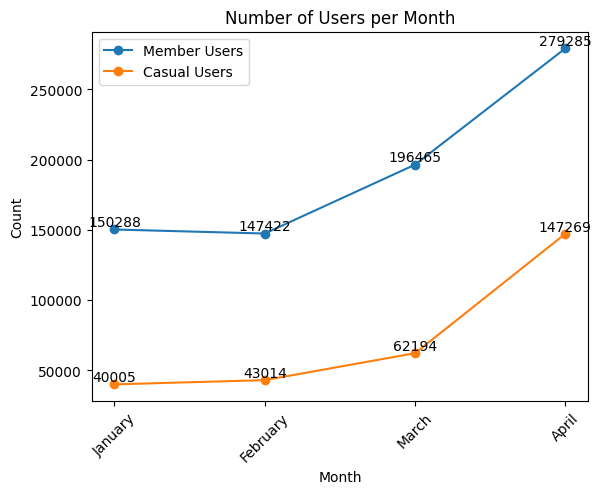

In [21]:
import calendar

df_2['started_at'] = pd.to_datetime(df_2['started_at'])

# Group the data by month and member_casual, and calculate the count
grouped = df_2.groupby([df_2['started_at'].dt.month, 'member_casual']).size()
df_grouped = grouped.reset_index(name='count')

# Create a figure and axis
fig, ax = plt.subplots()

# Filter the data for member users
df_member = df_grouped[df_grouped['member_casual'] == 'member']
ax.plot(df_member['started_at'], df_member['count'], marker='o', linestyle='-', label='Member Users')

# Filter the data for casual users
df_casual = df_grouped[df_grouped['member_casual'] == 'casual']
ax.plot(df_casual['started_at'], df_casual['count'], marker='o', linestyle='-', label='Casual Users')

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Number of Users per Month')

# Get month labels
month_labels = [calendar.month_name[i] for i in df_grouped['started_at'].unique()]

# Set x-axis tick labels
ax.set_xticks(df_grouped['started_at'].unique())
ax.set_xticklabels(month_labels, rotation=45)

# Add labels to the line chart for member users
for i, count in enumerate(df_member['count']):
    ax.text(df_member['started_at'].iloc[i], count, str(count), ha='center', va='bottom')

# Add labels to the line chart for casual users
for i, count in enumerate(df_casual['count']):
    ax.text(df_casual['started_at'].iloc[i], count, str(count), ha='center', va='bottom')

# Show the plot
plt.legend()
plt.show()


As we can see, the overall trend of users is **increasing** every months from January to April except from member users from January to April, and from March to April is a huge difference whether it's member users or casual users. From that insight, we can investigate and research why there's a huge difference from March to April, hopefully there will be a good news. 
Let's see the comparison of type of users and the type of bike.

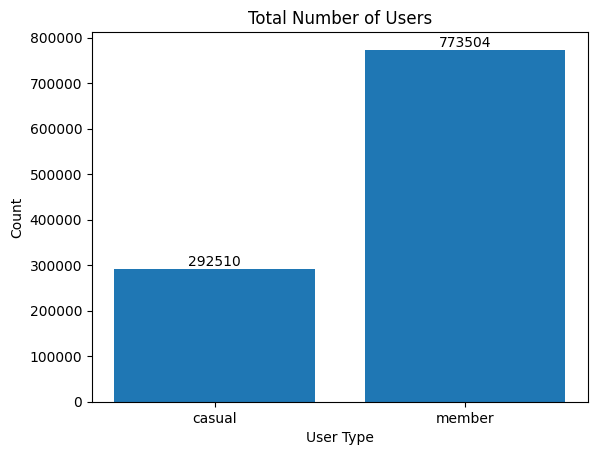

In [22]:
# Comparison of type of users

grouped = df.groupby('member_casual').size()
df_grouped = grouped.reset_index(name='count')

# Create a bar chart
plt.bar(df_grouped['member_casual'], df_grouped['count'])

# Add labels and title
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Total Number of Users')
for i, count in enumerate(df_grouped['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

The member users is still higher than casual users overall with member users is almost 3 times than casual users. From this insight, we can also investigate why there's a huge difference from these users, and from that maybe we can get actionabale insight for business.

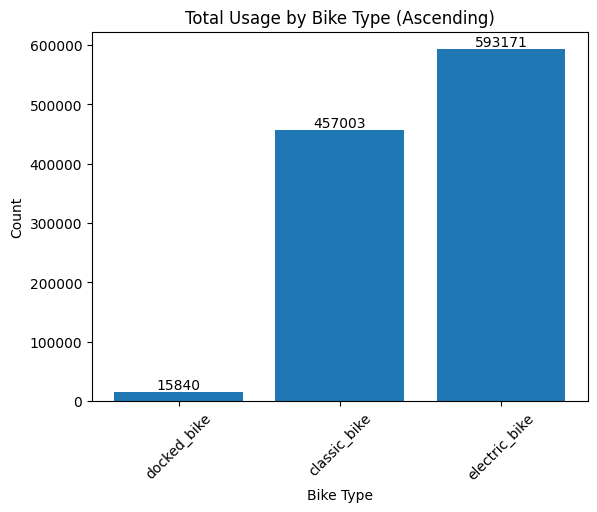

In [23]:
# Comparison of type of bike usage

# Group the data by rideable_type and calculate the count
grouped = df.groupby('rideable_type').size()
df_grouped = grouped.reset_index(name='count')

# Sort the data in ascending order based on the count
df_grouped = df_grouped.sort_values('count', ascending=True)

# Create a bar chart
plt.bar(df_grouped['rideable_type'], df_grouped['count'])

# Add labels and title
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.title('Total Usage by Bike Type (Ascending)')

# Add labels for each bar
for i, count in enumerate(df_grouped['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


Next, we want to know the distribution of duration usage per months using box plots.As we can see, the there are huge differences between docked bike and another type of bike. From that insight, maybe we'll have the insight of bike trend, why people choose electric bike and still love classic bike but prefer not to choose docked bike? Is it a seasonable trend or not? From that, the data analyst can compare the trend from the older data so they can have assumption that the difference is only because seasonal trend or even have the prospective value.

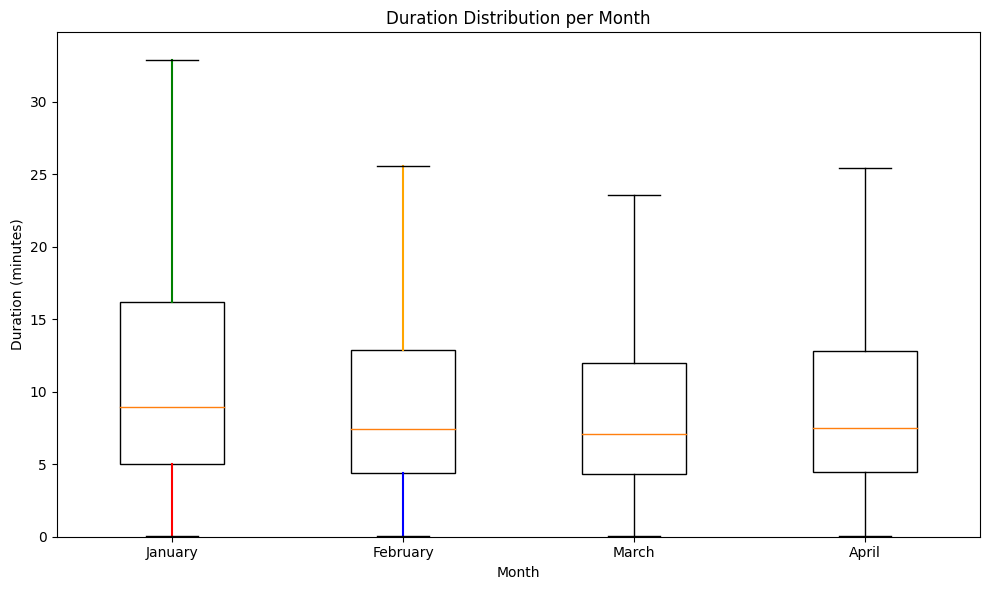

In [24]:
# Extract month from the datetime column
df_2['month'] = df_2['started_at'].dt.month_name()

# Group durations by month
grouped_data = df_2.groupby('month')['duration (min)'].apply(list)

# Create a list of month labels in order
months = df_2['month'].unique()

# create plot
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(grouped_data, labels=months, showfliers=False, patch_artist=True)

# Customize the box colors and whisker colors
box_color = 'white'
whisker_colors = ['red', 'green', 'blue', 'orange']
for box, whisker, color in zip(boxplot['boxes'], boxplot['whiskers'], whisker_colors):
    box.set(facecolor=box_color, edgecolor='black')
    whisker.set(color=color, linewidth=1.5)

# Calculate the padding and set y-axis limits
padding = 0.05  
lower_limit=0
upper_limit = df_2['duration (min)'].mean()+20
plt.ylim(lower_limit, upper_limit)

# Customize the plot
plt.title('Duration Distribution per Month')
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')

# Display the plot
plt.tight_layout()  
plt.show()


Let's explore the average duration per month for all users. Based on the box plot, we can observe that most users rarely use the bike for more than one hour. This prompts us to investigate whether our pricing might be considered expensive, discouraging longer usage, or if there are factors like bike comfort that may contribute to this behavior.

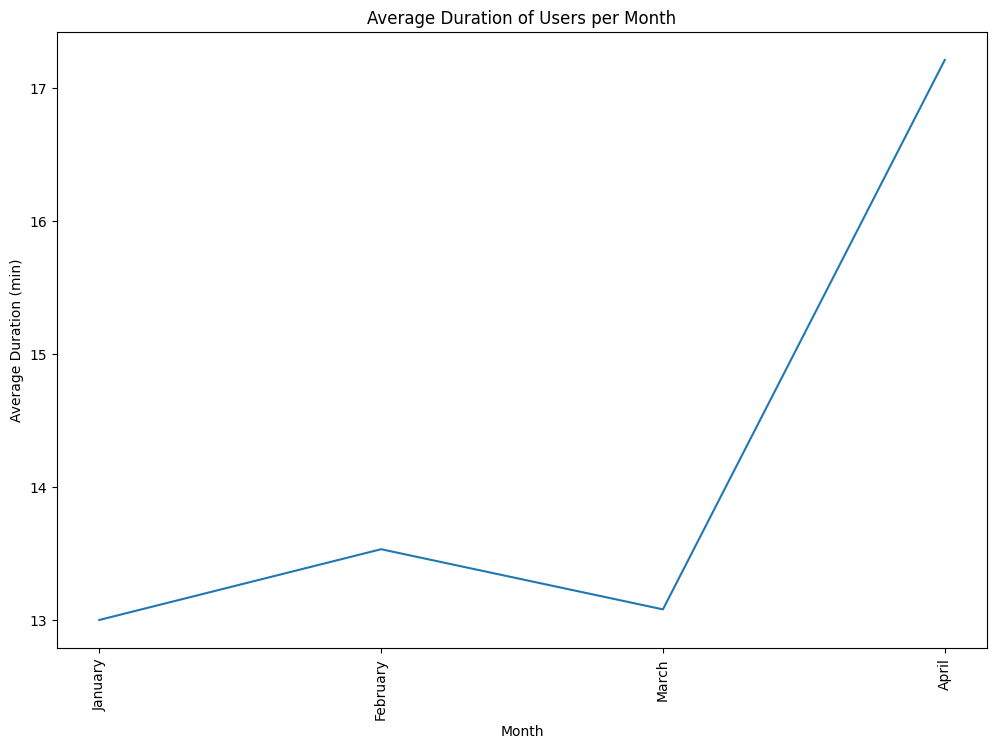

In [25]:
df_2['year'] = df_2['started_at'].dt.year

# Create a mapping dictionary to map month names to their corresponding numeric values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
}

# Map the month names to their corresponding numeric values
df_2['month_num'] = df_2['month'].map(month_mapping)

average_duration = df_2.groupby(['year', 'month', 'month_num'])['duration (min)'].mean().reset_index()
average_duration = average_duration.sort_values(['year', 'month_num'])

plt.figure(figsize=(12, 8))
plt.plot(range(len(average_duration)), average_duration['duration (min)'])
plt.xlabel('Month')
plt.ylabel('Average Duration (min)')
plt.title('Average Duration of Users per Month')

# Set the x-axis ticks and labels
plt.xticks(range(len(average_duration)), average_duration['month'], rotation='vertical')

plt.show()


The average duration for users per month shows a consistent increase over time. This insight prompts us to investigate the reasons behind users' preference for longer bike usage. Is our service improving over time, or are there emerging trends favoring bike usage over other modes of transportation like cars or buses? By analyzing this data, we can provide valuable recommendations to the team. For example, we may suggest implementing discounts for quarterly subscriptions or introducing rewards for users who rent bikes for more than 30 minutes. These strategies aim to further encourage and incentivize longer bike usage, leading to improved customer satisfaction and engagement.

# Recommendations

Based on the insights gained from the analysis, we can provide the following recommendations:

1. Encourage user conversion: Since there is a significant difference between casual and member users, we can recommend offering incentives or discounts to casual users to encourage them to switch to member status. This can include benefits such as discounted membership fees or additional perks for becoming a member.

2. Reward frequent users: To promote increased bike usage, we can implement a rewards program for users who consistently utilize the bikes for a certain duration. For example, users who exceed a specific threshold, such as a certain number of minutes or trips per month, could be eligible for rewards or discounts on future rentals.

3. Quarterly discounts: To boost user engagement and retention, we can introduce special discounts or promotions for users who commit to using the service for an extended period, such as quarterly subscriptions. This encourages users to make a longer-term commitment and provides them with a cost-saving incentive.

4. Promote bike combinations: Considering the significant difference between docked bikes and other types of bikes, we can recommend offering a slight discount or promotional offer for users who opt for a combination of docked bikes and other bike types. This encourages users to experience the benefits of both options and may help increase overall bike usage.

These recommendations aim to improve user **satisfaction, increase user retention**, and **drive overall business growth** for Cyclistic.